In [1]:
# Basic Import
import numpy as np
import pandas as pd

# Vis.
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
data = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data['gender'].value_counts()


standard        645
free/reduced    355
Name: lunch, dtype: int64

In [6]:
data['race/ethnicity'].value_counts()


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [7]:
data['parental level of education'].value_counts()


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [8]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='math score'>

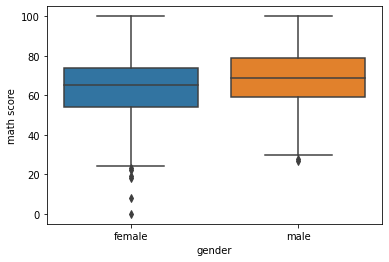

In [9]:
sns.boxplot (x = "gender",y="math score",data = data)

Scatter plots  are often used for continous variables in our data within a specific range

In [10]:
data["mean_scores"] = (data["math score"] + data["reading score"] + data["writing score"]) / 3

In [11]:
data.describe()

,math score,reading score,writing score,mean_scores
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [12]:
data.corr()

,math score,reading score,writing score,mean_scores
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
mean_scores,0.918746,0.970331,0.965667,1.000000


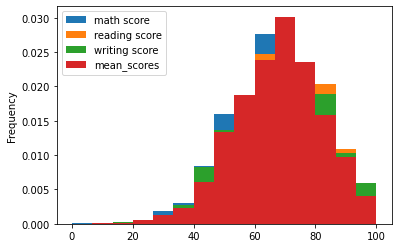

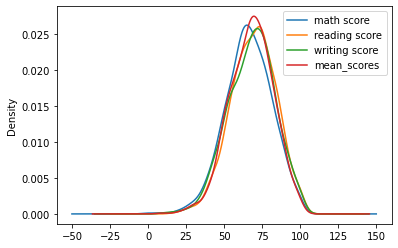

In [13]:
import matplotlib.pyplot as plt
# I did that to see histogram plot and distribution of exam_scores

def histogramPlot(variable):
    variable.plot(kind = "hist", density = True, bins = 15)
    variable.plot(kind = "kde");

if __name__=='__main__':
    histogramPlot(data)

In [14]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [15]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'mean_scores'],
      dtype='object')

In [18]:
def groupbyFunc(data,category):
#Analyze the mean of the categories 
    values = data[category].value_counts()
    category_analysis = data.groupby(category).mean()
    return values, category_analysis

groupbyFunc(data, "parental level of education")

(some college          226
 associate's degree    222
 high school           196
 some high school      179
 bachelor's degree     118
 master's degree        59
 Name: parental level of education, dtype: int64,
                              math score  reading score  writing score  \
 parental level of education                                             
 associate's degree            67.882883      70.927928      69.896396   
 bachelor's degree             69.389831      73.000000      73.381356   
 high school                   62.137755      64.704082      62.448980   
 master's degree               69.745763      75.372881      75.677966   
 some college                  67.128319      69.460177      68.840708   
 some high school              63.497207      66.938547      64.888268   
 
                              mean_scores  
 parental level of education               
 associate's degree             69.569069  
 bachelor's degree              71.923729  
 high school      

Students have better scores when their parents graduated with a Master's degree

In [19]:
groupbyFunc(data, "race/ethnicity")

(group C    319
 group D    262
 group B    190
 group E    140
 group A     89
 Name: race/ethnicity, dtype: int64,
                 math score  reading score  writing score  mean_scores
 race/ethnicity                                                       
 group A          61.629213      64.674157      62.674157    62.992509
 group B          63.452632      67.352632      65.600000    65.468421
 group C          64.463950      69.103448      67.827586    67.131661
 group D          67.362595      70.030534      70.145038    69.179389
 group E          73.821429      73.028571      71.407143    72.752381)

Group E has the best score

In [21]:
groupbyFunc(data,"gender")

(female    518
 male      482
 Name: gender, dtype: int64,
         math score  reading score  writing score  mean_scores
 gender                                                       
 female   63.633205      72.608108      72.467181    69.569498
 male     68.728216      65.473029      63.311203    65.837483)

Females have a better score in their lessons than males


Visualize a boxplot to analyze numeric and cateogrical variables

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


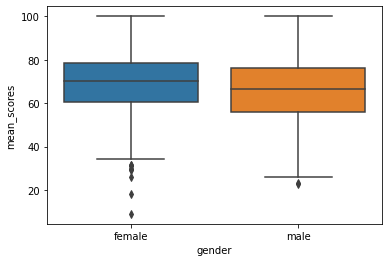

In [35]:
sns.boxplot(data.gender, data.mean_scores)
plt.show()

Check relationship between gender and mean scores


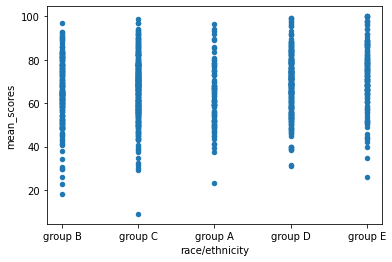

In [32]:
data.plot.scatter(x="race/ethnicity",y="mean_scores")
plt.show()

DROP OUTLIERS

In [36]:
def drop_outliers(df,column_name,lower,upper):
    drop_outliers = df[column_name].between(df[column_name].quantile(lower), df[column_name].quantile(upper))
    
    print(str(df[column_name][drop_outliers].size) + "/" + str(df[column_name].size) + " data points remain.") 

    index_names = df[~drop_outliers].index
    return df.drop(index_names)


new_data = drop_outliers(data,"mean_scores",0.05,0.95) 

900/1000 data points remain.


In [37]:
print("data:",data.shape)
print("new_data:", new_data.shape)

data: (1000, 9)
new_data: (900, 9)


In [38]:
math_score = new_data["math score"]
reading_score = new_data["reading score"]
writing_score = new_data["writing score"]
mean_score = new_data["mean_scores"]
X_features = new_data.drop(["math score","reading score","writing score","mean_scores"],axis = 'columns') 

In [40]:
X_features

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
5,female,group B,associate's degree,standard,none
...,...,...,...,...,...
994,male,group A,high school,standard,none
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [41]:
X_features_encoded = X_features.apply(lambda x: x.astype('category')) 

X_features_encoded = pd.get_dummies(X_features_encoded,drop_first= True)
X_features_encoded

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,0,0,0,0,0,1,0,0,0,1,1
996,1,0,1,0,0,0,1,0,0,0,0,1
997,0,0,1,0,0,0,1,0,0,0,0,0
998,0,0,0,1,0,0,0,0,1,0,1,0


In [42]:
mean_score


0      72.666667
1      82.333333
3      49.333333
4      76.333333
5      77.333333
         ...    
994    62.666667
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: mean_scores, Length: 900, dtype: float64

In [43]:
target = mean_score
X_train, X_val, y_train, y_val = train_test_split(X_features_encoded, 
                                                      target, 
                                                      test_size=0.4, 
                                                      shuffle = True, 
                                                      random_state=1)

In [44]:
# true ---> real     predicted---> predict
def calculateModel(real, predict):
    rmse = np.sqrt(mean_squared_error(real, predict))
    r2 = r2_score(real, predict)
    print("rmse:",rmse)
    print("r2 score:",r2)

In [45]:
## Random Forest and Linear Model that I tried to calculate model
print("Random Forest Regressor")
print("------------")
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
rf_pred = rf.predict(X_train)
print("Train set of RF")
calculateModel(y_train,rf_pred)

print("------------")
print("Test set of RF")
rf_pred_val= rf.predict(X_val)
calculateModel(y_val,rf_pred_val)

print("------------")


print("Linear Regression")
print("------------")
lr = LinearRegression(normalize=True).fit(X_train, y_train)
lr_pred = lr.predict(X_train)
print("Train set of LR")
calculateModel(y_train,lr_pred)

print("------------")
print("Test set of LR")
lr_pred_val= lr.predict(X_val)
calculateModel(y_val,lr_pred_val)

Random Forest Regressor
------------
Train set of RF
rmse: 8.574682009141531
r2 score: 0.41783250568166785
------------
Test set of RF
rmse: 11.790181517501644
r2 score: -0.08320858927677355
------------
Linear Regression
------------
Train set of LR
rmse: 10.346337851989173
r2 score: 0.15241118329678904
------------
Test set of LR
rmse: 10.33611640104146
r2 score: 0.1674968310397632
